In [2]:
import pandas as pd

# Load the CSV file
csv_file = 'left_hand.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=None)  # Use header=None if the CSV has no header row

# Define the allowed labels
allowed_labels = ['q', 'w', 'e', 'r', 't', 'a', 's', 'd', 'f', 'g', 'z', 'x', 'c', 'v', 'b', 'space']
# allowed_labels = ['y', 'u', 'i', 'o', 'p', 'h', 'j', 'k', 'l', 'n', 'm', 'backspace']

# Filter rows where the label (last column) is in the allowed_labels set
filtered_data = data[data.iloc[:, -1].isin(allowed_labels)]

# Save the updated DataFrame to a new CSV file
output_csv = 'updated_left_hand.csv'  # Replace with the desired output file name
filtered_data.to_csv(output_csv, index=False, header=False)  # Use header=False if the original CSV has no header

print(f"Updated CSV saved to {output_csv}")
print(f"Original number of rows: {len(data)}")
print(f"Number of rows after filtering: {len(filtered_data)}")

Updated CSV saved to updated_left_hand.csv
Original number of rows: 6997
Number of rows after filtering: 3999


Epoch 1/100


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2659 - loss: 7.3540 - val_accuracy: 0.3617 - val_loss: 6.3312 - learning_rate: 0.0010
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4787 - loss: 5.0807 - val_accuracy: 0.3250 - val_loss: 4.9788 - learning_rate: 0.0010
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5752 - loss: 3.7016 - val_accuracy: 0.3233 - val_loss: 4.0203 - learning_rate: 0.0010
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6608 - loss: 2.7751 - val_accuracy: 0.4483 - val_loss: 3.2430 - learning_rate: 0.0010
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7173 - loss: 2.1427 - val_accuracy: 0.5700 - val_loss: 2.6451 - learning_rate: 0.0010
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 1.6787 - val_accuracy: 0.6533 - val_loss: 2.0905 - learning_rate: 0.0010
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7824 - loss: 1.4485 - val_accuracy: 0.73

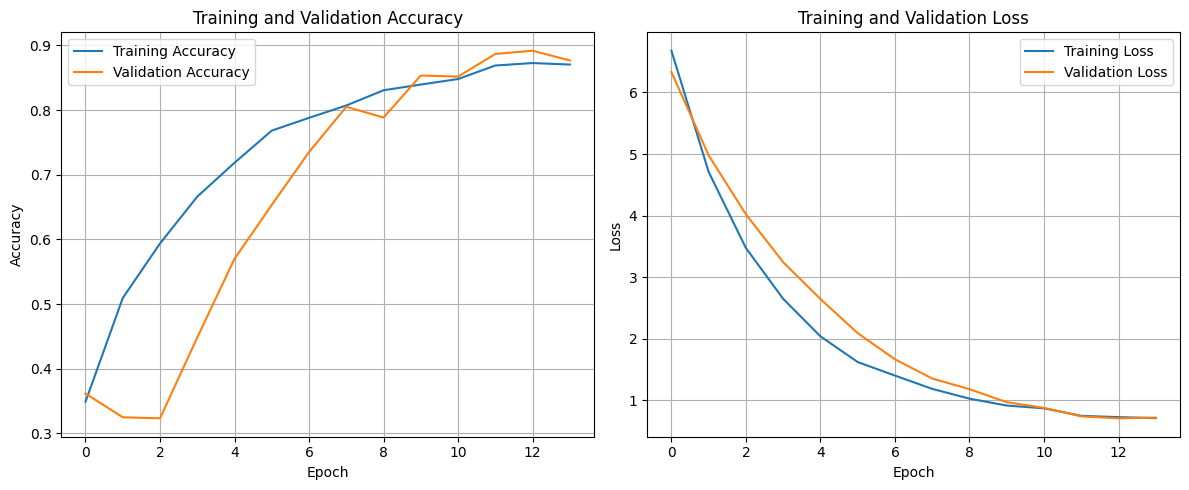

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Labels: ['z' 'z' 'z' 'z' 'z' 'z']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 23.3942
Test Accuracy: 0.0000
Test Loss: 23.3942
              precision    recall  f1-score   support

           c       0.00      0.00      0.00       3.0
           d       0.00      0.00      0.00       3.0
           z       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Define file paths
csv_file = 'updated_left_hand.csv'  # Replace with your CSV file path
unseen_csv_file = 'left_test.csv'  # Replace with the path to your unseen data CSV file

# Load the CSV file
data = pd.read_csv(csv_file, header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one are features
y = data.iloc[:, -1].values   # The last column is the label

# Reshape X to match the input shape for the 1D CNN
num_landmarks = 21
num_features = 3
X = X.reshape(-1, num_landmarks, num_features)  # Reshape to (num_samples, 21, 3)

# Normalize the features
scaler = StandardScaler()
X = X.reshape(-1, num_landmarks * num_features)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape(-1, num_landmarks, num_features)  # Reshape back to original format

# Encode labels (a to z, space, backspace) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the labels
num_classes = len(np.unique(y))  # Dynamically determine number of classes
y = to_categorical(y, num_classes)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Function to create the model
def create_model(optimizer='adam', dropout_rate=0.5, num_filters=64, kernel_size=3, pool_size=2, learning_rate=0.0001):
    model = Sequential([
        Conv1D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=(num_landmarks, num_features), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Conv1D(128, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the best parameters for final training
best_params = {
    'batch_size': 64,
    'dropout_rate': 0.3,
    'epochs': 100,
    'kernel_size': 3,
    'learning_rate': 0.001,
    'num_filters': 128,
    'pool_size': 2
}

# Create the final model with the best hyperparameters
final_model = create_model(
    dropout_rate=best_params['dropout_rate'],
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    pool_size=best_params['pool_size'],
    learning_rate=best_params['learning_rate']
)

# Combine X_train and X_val for final training
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

# Train the model
history = final_model.fit(
    X_train_full, y_train_full,
    validation_data=(X_test, y_test),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)],
    verbose=1
)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Load the unseen data
unseen_data = pd.read_csv(unseen_csv_file, header=None)

# Define allowed labels
allowed_labels = ['q', 'w', 'e', 'r', 't', 'a', 's', 'd', 'f', 'g', 'z', 'x', 'c', 'v', 'b', 'space']  # Update with actual allowed labels

# Filter unseen data
unseen_data = unseen_data[unseen_data.iloc[:, -1].isin(allowed_labels)]

# Separate features (X_unseen) and labels (y_unseen, if available)
X_unseen = unseen_data.iloc[:, :-1].values  # All columns except the last one are features
y_unseen = unseen_data.iloc[:, -1].values   # The last column is the label (if available)

# Reshape and normalize the unseen data
X_unseen = X_unseen.reshape(-1, num_landmarks, num_features)
X_unseen = X_unseen.reshape(-1, num_landmarks * num_features)  # Flatten for scaling
X_unseen = scaler.transform(X_unseen)  # Use the same scaler as during training
X_unseen = X_unseen.reshape(-1, num_landmarks, num_features)

# Encode labels for unseen data if present
if len(y_unseen) > 0:
    y_unseen_encoded = label_encoder.transform(y_unseen)  # Encode labels to integers
    y_unseen_onehot = to_categorical(y_unseen_encoded, num_classes=num_classes)  # One-hot encode

# Make predictions on the unseen data
predictions = final_model.predict(X_unseen)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels back to their original string labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Print the predicted labels
print("Predicted Labels:", predicted_labels_decoded)

# Evaluate the model (if true labels are available)
if len(y_unseen) > 0:
    test_loss, test_accuracy = final_model.evaluate(X_unseen, y_unseen_onehot)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Print a classification report
    print(classification_report(y_unseen, predicted_labels_decoded))


# right

In [8]:
import pandas as pd

# Load the CSV file
csv_file = 'right_hand.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=None)  # Use header=None if the CSV has no header row

# Define the allowed labels
allowed_labels = ['y', 'u', 'i', 'o', 'p', 'h', 'j', 'k', 'l', 'n', 'm', 'backspace']

# Filter rows where the label (last column) is in the allowed_labels set
filtered_data = data[data.iloc[:, -1].isin(allowed_labels)]

# Save the updated DataFrame to a new CSV file
output_csv = 'updated_right_hand.csv'  # Replace with the desired output file name
filtered_data.to_csv(output_csv, index=False, header=False)  # Use header=False if the original CSV has no header

print(f"Updated CSV saved to {output_csv}")
print(f"Original number of rows: {len(data)}")
print(f"Number of rows after filtering: {len(filtered_data)}")

Updated CSV saved to updated_right_hand.csv
Original number of rows: 7001
Number of rows after filtering: 3000


Epoch 1/100


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4661 - loss: 6.8079 - val_accuracy: 0.6711 - val_loss: 6.2901 - learning_rate: 0.0010
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8930 - loss: 4.3088 - val_accuracy: 0.5244 - val_loss: 4.9724 - learning_rate: 0.0010
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 3.0761 - val_accuracy: 0.5978 - val_loss: 3.9671 - learning_rate: 0.0010
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9618 - loss: 2.1977 - val_accuracy: 0.6933 - val_loss: 3.1316 - learning_rate: 0.0010
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9657 - loss: 1.5785 - val_accuracy: 0.7800 - val_loss: 2.5178 - learning_rate: 0.0010
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9883 - loss: 1.1021 - val_accuracy: 0.8244 - val_loss: 2.1295 - learning_rate: 0.0010
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9917 - loss: 0.7988 - val_accuracy: 0.89

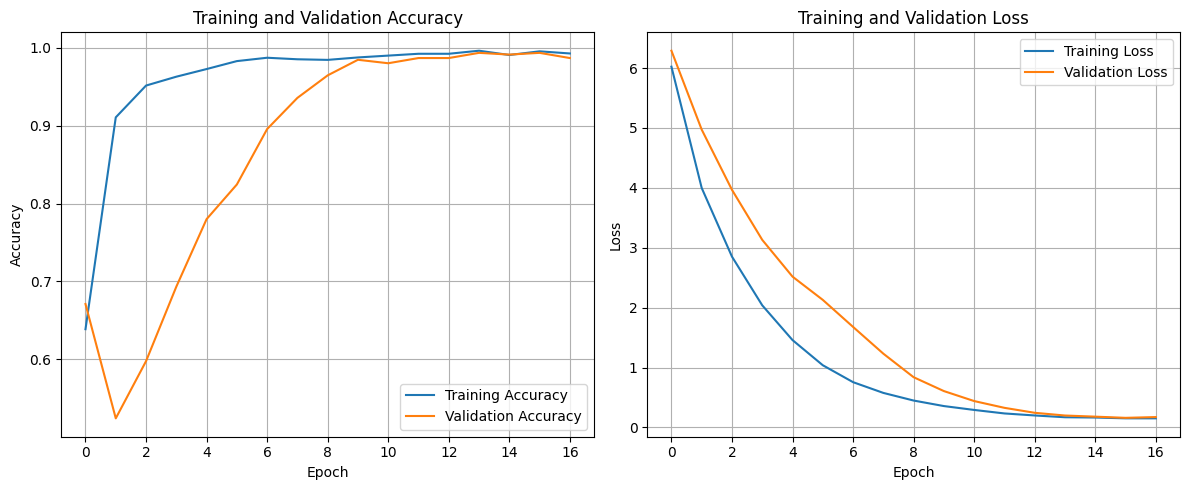

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Labels: ['k' 'k' 'k' 'k' 'k' 'k']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 176.4622
Test Accuracy: 0.0000
Test Loss: 176.4622
              precision    recall  f1-score   support

           h       0.00      0.00      0.00       3.0
           k       0.00      0.00      0.00       0.0
           o       0.00      0.00      0.00       3.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Define file paths
csv_file = 'updated_right_hand.csv'  # Replace with your CSV file path
unseen_csv_file = 'right_test.csv'  # Replace with the path to your unseen data CSV file

# Load the CSV file
data = pd.read_csv(csv_file, header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one are features
y = data.iloc[:, -1].values   # The last column is the label

# Reshape X to match the input shape for the 1D CNN
num_landmarks = 21
num_features = 3
X = X.reshape(-1, num_landmarks, num_features)  # Reshape to (num_samples, 21, 3)

# Normalize the features
scaler = StandardScaler()
X = X.reshape(-1, num_landmarks * num_features)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape(-1, num_landmarks, num_features)  # Reshape back to original format

# Encode labels (a to z, space, backspace) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the labels
num_classes = len(np.unique(y))  # Dynamically determine number of classes
y = to_categorical(y, num_classes)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Function to create the model
def create_model(optimizer='adam', dropout_rate=0.5, num_filters=64, kernel_size=3, pool_size=2, learning_rate=0.0001):
    model = Sequential([
        Conv1D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=(num_landmarks, num_features), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Conv1D(128, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the best parameters for final training
best_params = {
    'batch_size': 64,
    'dropout_rate': 0.3,
    'epochs': 100,
    'kernel_size': 3,
    'learning_rate': 0.001,
    'num_filters': 128,
    'pool_size': 2
}

# Create the final model with the best hyperparameters
final_model = create_model(
    dropout_rate=best_params['dropout_rate'],
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    pool_size=best_params['pool_size'],
    learning_rate=best_params['learning_rate']
)

# Combine X_train and X_val for final training
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

# Train the model
history = final_model.fit(
    X_train_full, y_train_full,
    validation_data=(X_test, y_test),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)],
    verbose=1
)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Load the unseen data
unseen_data = pd.read_csv(unseen_csv_file, header=None)

# Define allowed labels
allowed_labels = ['y', 'u', 'i', 'o', 'p', 'h', 'j', 'k', 'l', 'n', 'm', 'backspace']  # Update with actual allowed labels

# Filter unseen data
unseen_data = unseen_data[unseen_data.iloc[:, -1].isin(allowed_labels)]

# Separate features (X_unseen) and labels (y_unseen, if available)
X_unseen = unseen_data.iloc[:, :-1].values  # All columns except the last one are features
y_unseen = unseen_data.iloc[:, -1].values   # The last column is the label (if available)

# Reshape and normalize the unseen data
X_unseen = X_unseen.reshape(-1, num_landmarks, num_features)
X_unseen = X_unseen.reshape(-1, num_landmarks * num_features)  # Flatten for scaling
X_unseen = scaler.transform(X_unseen)  # Use the same scaler as during training
X_unseen = X_unseen.reshape(-1, num_landmarks, num_features)

# Encode labels for unseen data if present
if len(y_unseen) > 0:
    y_unseen_encoded = label_encoder.transform(y_unseen)  # Encode labels to integers
    y_unseen_onehot = to_categorical(y_unseen_encoded, num_classes=num_classes)  # One-hot encode

# Make predictions on the unseen data
predictions = final_model.predict(X_unseen)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels back to their original string labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Print the predicted labels
print("Predicted Labels:", predicted_labels_decoded)

# Evaluate the model (if true labels are available)
if len(y_unseen) > 0:
    test_loss, test_accuracy = final_model.evaluate(X_unseen, y_unseen_onehot)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Print a classification report
    print(classification_report(y_unseen, predicted_labels_decoded))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.4786 - loss: 6.8064 - val_accuracy: 0.7378 - val_loss: 6.2913 - learning_rate: 0.0010
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8935 - loss: 4.3530 - val_accuracy: 0.5356 - val_loss: 5.0650 - learning_rate: 0.0010
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9514 - loss: 3.1203 - val_accuracy: 0.5067 - val_loss: 4.0836 - learning_rate: 0.0010
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9666 - loss: 2.2190 - val_accuracy: 0.5933 - val_loss: 3.2449 - learning_rate: 0.0010
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9605 - loss: 1.6274 - val_accuracy: 0.8022 - val_loss: 2.5053 - learning_rate: 0.0010
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9858 - loss: 1.1441 - val_accuracy: 0.8822 - val_loss: 2.0609 - learning_rate: 0.0010
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9835 - loss: 0.8413 - val_accuracy

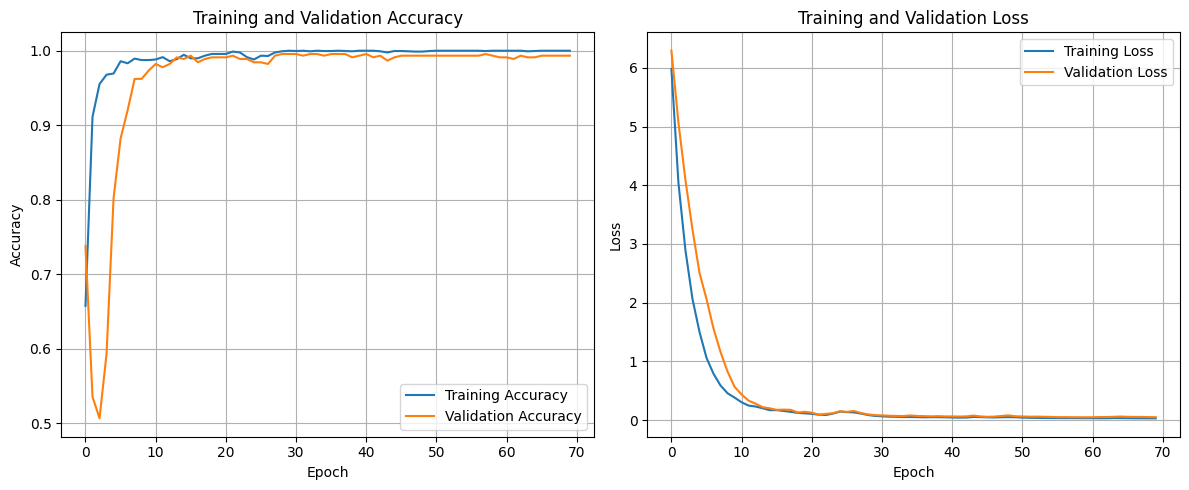

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load the CSV file
csv_file = 'updated_right_hand.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file, header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one are features
y = data.iloc[:, -1].values   # The last column is the label

# Reshape X to match the input shape for the 1D CNN
num_landmarks = 21
num_features = 3
X = X.reshape(-1, num_landmarks, num_features)  # Reshape to (num_samples, 21, 3)

# Normalize the features
scaler = StandardScaler()
X = X.reshape(-1, num_landmarks * num_features)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape(-1, num_landmarks, num_features)  # Reshape back to original format

# Encode labels (a to z, space, backspace) as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the labels
num_classes = len(np.unique(y))  # Dynamically determine number of classes
y = to_categorical(y, num_classes)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Function to create the model
def create_model(optimizer='adam', dropout_rate=0.5, num_filters=64, kernel_size=3, pool_size=2, learning_rate=0.0001):
    model = Sequential([
        Conv1D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=(num_landmarks, num_features), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Conv1D(128, kernel_size=kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=pool_size),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model# Use the best hyperparameters to create the final model
best_params = {
    'batch_size': 64,
    'dropout_rate': 0.3,
    'epochs': 100,
    'kernel_size': 3,
    'learning_rate': 0.001,
    'num_filters': 128,
    'pool_size': 2
}

# Create the final model with the best hyperparameters
final_model = create_model(
    dropout_rate=best_params['dropout_rate'],
    num_filters=best_params['num_filters'],
    kernel_size=best_params['kernel_size'],
    pool_size=best_params['pool_size'],
    learning_rate=best_params['learning_rate']
)

# Train the final model on the full training set (X_train + X_val)
# Combine X_train and X_val for final training
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

# Train the model
history = final_model.fit(
    X_train_full, y_train_full,
    validation_data=(X_test, y_test),  # Use the test set for validation during training
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ],
    verbose=1
)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()